# Get 6C Data for Event

Get 6C data for ROMY and store it

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt

from obspy.clients.fdsn import Client

from andbro__read_sds import __read_sds

In [2]:
from functions.rotate_romy_ZUV_ZNE import __rotate_romy_ZUV_ZNE
from functions.get_event_info import __get_event_info

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [4]:
config = {}

## output path for figures
config['path_to_figs'] = data_path+"romy_events/figures/"

config['path_to_outdata'] = data_path+"romy_events/data/"

config['path_to_sds'] = archive_path+"romy_archive/"

config['path_to_inventory'] = root_path+"Documents/ROMY/stationxml_ringlaser/dataless/"

## BSPF coordinates
config['sta_lon'] = 11.275501
config['sta_lat'] = 48.162941

# specify mask for ADR
config['submask'] = ""

# specify frequency band
config['fmin'] = 0.01
config['fmax'] = 0.1

# specify client
config['Client'] = Client("GFZ")


# config['seed_acc'] = "BW.DROMY..HH*"
config['seed_acc'] = "GR.FUR..BH*"


config['path_to_rot'] = archive_path+"romy_archive/"

if "DROMY" in config['seed_acc']:
    config['path_to_acc'] = archive_path+"romy_archive/"
elif "FUR" in config['seed_acc']:
    config['path_to_acc'] = bay_path+"mseed_online/archive/"

## Eventtime
# config['eventtime'] = obs.UTCDateTime("2023-10-25 13:40:00")

# config['event_name'] = "Italy"
# config['tbeg'] = obs.UTCDateTime("2023-10-25 13:45:00")
# config['tend'] = obs.UTCDateTime("2023-10-25 13:50:00")

# config['event_name'] = "Morocco"
# config['tbeg'] = obs.UTCDateTime("2023-09-08 22:00")
# config['tend'] = obs.UTCDateTime("2023-09-08 23:00")

# config['event_name'] = "Morocco2"
# config['tbeg'] = obs.UTCDateTime("2023-09-08 22:30")
# config['tend'] = obs.UTCDateTime("2023-09-08 23:30")

# config['event_name'] = "Mindanao" ## M7-6
# config['tbeg'] = obs.UTCDateTime("2023-12-02 14:37")
# config['tend'] = obs.UTCDateTime("2023-12-02 17:00")

# config['event_name'] = "Mindanao2" ## M6.6
# config['tbeg'] = obs.UTCDateTime("2023-12-03 10:35")
# config['tend'] = obs.UTCDateTime("2023-12-03 12:35")

# config['event_name'] = "Meteoride"
# config['tbeg'] = obs.UTCDateTime("2024-01-21 00:15")
# config['tend'] = obs.UTCDateTime("2024-01-21 00:50")

config['event_name'] = "Montenegro"
config['tbeg'] = obs.UTCDateTime("2024-03-14 03:06")
config['tend'] = obs.UTCDateTime("2024-03-14 03:36")

# config['event_name'] = "distortions"
# config['tbeg'] = obs.UTCDateTime("2023-12-02 18:25:00")
# config['tend'] = obs.UTCDateTime("2023-12-02 18:40:00")

# config['event_name'] = "Germany"
# config['tbeg'] = obs.UTCDateTime("2024-03-22 05:30:00")
# config['tend'] = obs.UTCDateTime("2024-03-22 05:40:00")

# config['event_name'] = "Italy2"
# config['tbeg'] = obs.UTCDateTime("2024-03-27 21:32:00")
# config['tend'] = obs.UTCDateTime("2024-03-27 21:35:00")

# config['event_name'] = "Taiwan"
# config['tbeg'] = obs.UTCDateTime("2024-04-03 00:11:00")
# config['tend'] = obs.UTCDateTime("2024-04-03 03:11:00")

# config['event_name'] = "Noise"
# config['tbeg'] = obs.UTCDateTime("2024-03-29 00:00")
# config['tend'] = obs.UTCDateTime("2024-03-30 00:00")

config['event_name'] = "Wind"
config['tbeg'] = obs.UTCDateTime("2024-03-21 00:00")
config['tend'] = obs.UTCDateTime("2024-03-22 00:00")


## Load Data

#### Find event in catalog

In [5]:
# config, dist, baz, az = __get_event_info(config, min_mag=2)
# event = Client("IRIS").get_events(starttime=config['tbeg'], endtime=config['tend'], minmagnitude=2.0)
# event = event[0]

#### Load inventory

In [6]:
romy_inv = obs.read_inventory(config['path_to_inventory']+"dataless.seed.BW_ROMY")
# romy_inv = obs.read_inventory(config['path_to_inventory']+"../station_BW_ROMY.xml")
romy_inv = obs.read_inventory(config['path_to_inventory']+"../romy_george.xml")
# romy_inv = obs.read_inventory(config['path_to_inventory']+"../station_BW_ROMY2.xml")

if "DROMY" in config['seed_acc']:
    seis_inv = obs.read_inventory(config['path_to_inventory']+"dataless.seed.BW_DROMY")
elif "FUR" in config['seed_acc']:
    seis_inv = obs.read_inventory(config['path_to_inventory']+"dataless.seed.GR_FUR")


In [7]:
st0 = obs.Stream()

st0 += __read_sds(config['path_to_sds'], "BW.ROMY.10.BJZ", config['tbeg']-1, config['tend']+1)
st0 += __read_sds(config['path_to_sds'], "BW.ROMY..BJU", config['tbeg']-1, config['tend']+1)
st0 += __read_sds(config['path_to_sds'], "BW.ROMY..BJV", config['tbeg']-1, config['tend']+1)

if len(st0) > 3:
    print(f" -> merging required!")
    st0.merge(fill_value="interpolate")

st0 = st0.trim(config['tbeg'], config['tend'])
st0

 -> merging required!


3 Trace(s) in Stream:
BW.ROMY..BJU   | 2024-03-21T00:00:00.006599Z - 2024-03-22T00:00:00.006599Z | 20.0 Hz, 1728001 samples
BW.ROMY..BJV   | 2024-03-20T23:59:59.997799Z - 2024-03-21T23:59:59.997799Z | 20.0 Hz, 1728001 samples
BW.ROMY.10.BJZ | 2024-03-21T00:00:00.004199Z - 2024-03-22T00:00:00.004199Z | 20.0 Hz, 1728001 samples

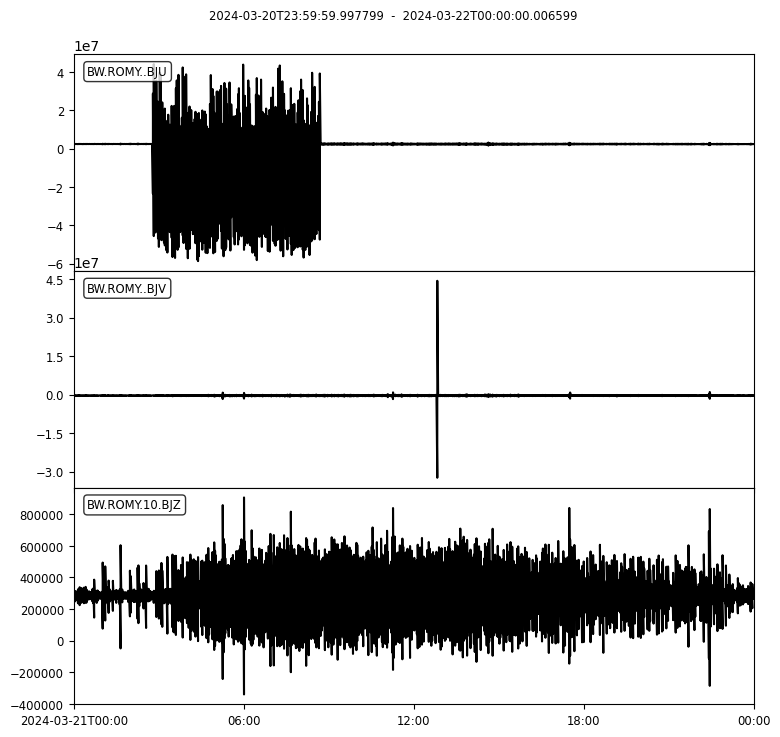

In [8]:
st0.plot(equal_scale=False);

## Process Translation Data

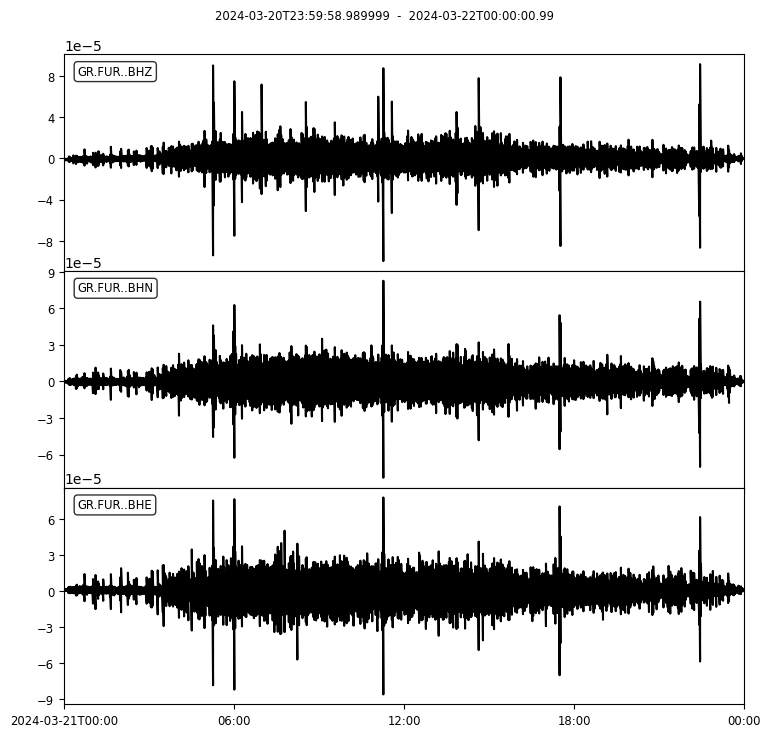

In [9]:
acc = __read_sds(config['path_to_acc'], config['seed_acc'], config['tbeg']-1, config['tend']+1)

acc = acc.remove_response(seis_inv, output="ACC", water_level=60)

acc = acc.detrend("linear")

acc.plot(equal_scale=False);

## Process Rotation Data

In [10]:
romy_inv

Inventory created at 2024-04-05T15:09:58.000000Z
	Created by: JANE WEB SERVICE: fdsnws-station | Jane version: 0.0.0+archive
		    http://george/fdsnws/station/1/query?network=BW&station=ROMY&locati...
	Sending institution: George (George)
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.ROMY (RingLaser, Bavaria, BW-Net)
		Channels (10):
			BW.ROMY..BJU, BW.ROMY..BJV, BW.ROMY..BJW, BW.ROMY.10.BJZ, 
			BW.ROMY.20.BJZ, BW.ROMY.20.BJN, BW.ROMY.20.BJE, BW.ROMY.30.BJZ, 
			BW.ROMY.30.BJN, BW.ROMY.30.BJE

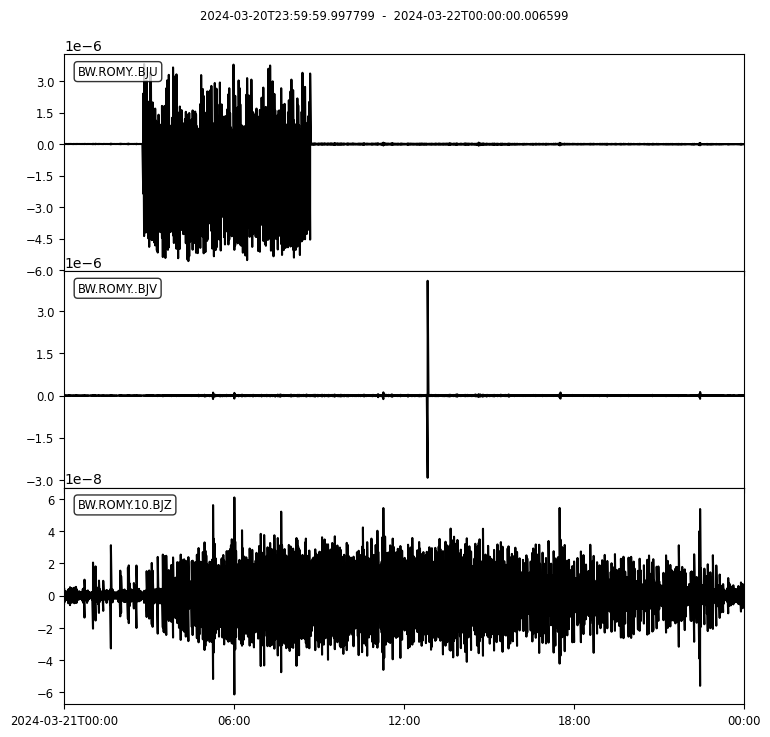

In [11]:
rot = st0.copy()

rot = rot.remove_sensitivity(romy_inv)

rot = rot.detrend("linear")

# rot = rot.taper(0.1)
# rot = rot.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

rot.plot(equal_scale=False);

In [12]:
rot_zne = __rotate_romy_ZUV_ZNE(rot, romy_inv)

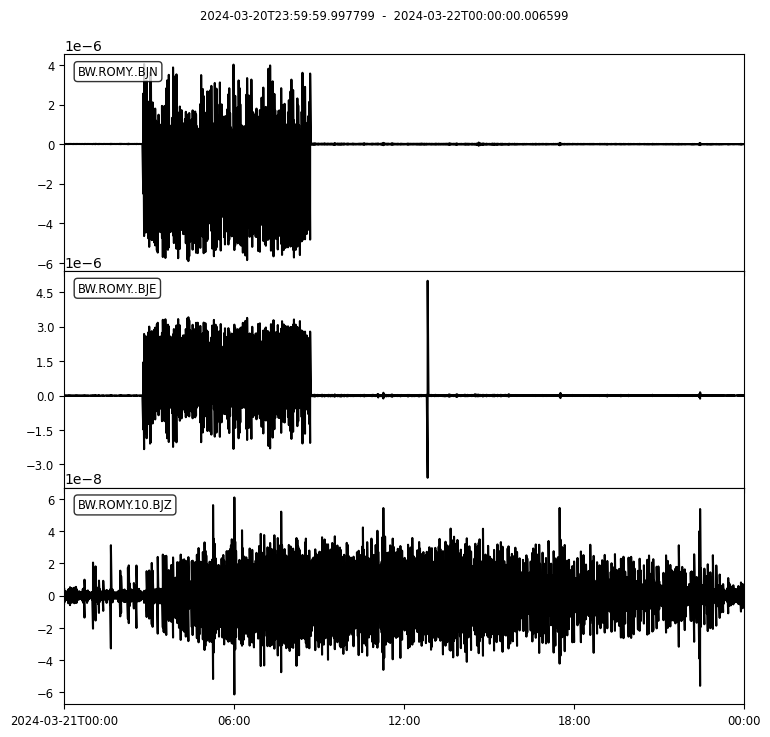

In [13]:
rot_zne.plot(equal_scale=False);

### Plot Waveforms

In [14]:
from functions.makeplot_waveforms import __makeplot_waveforms

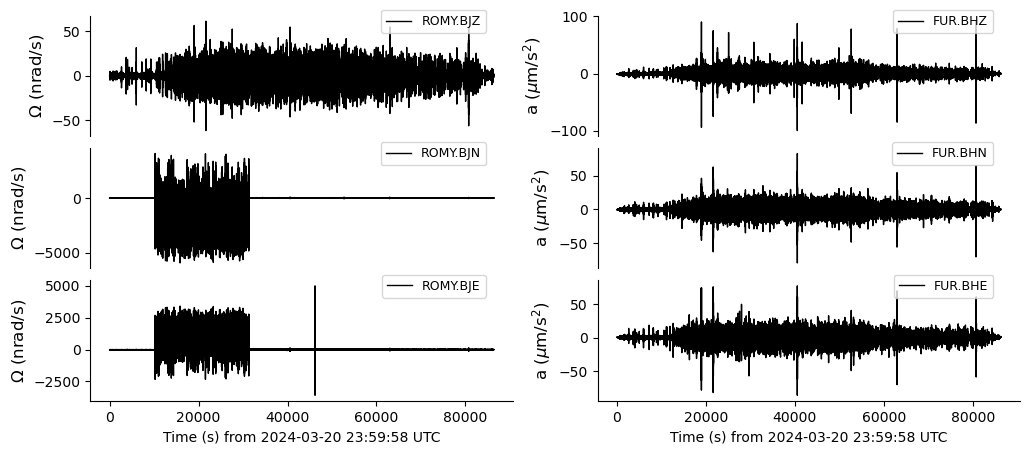

In [15]:
fig = __makeplot_waveforms(acc, rot_zne)

## Compare Waveforms

In [16]:
def __makeplot_waveform_comparison(st1, st2):

    fig, ax = plt.subplots(3, 1, figsize=(15, 5), sharex=True)

    font = 14

    rot_scaling = 1e9

    lw = 1

    ax[0].plot(st1.select(channel="*Z")[0].times(), st1.select(channel="*Z")[0].data*rot_scaling, lw=lw, label="Z", color="darkred", ls="-", zorder=3)
    ax[0].plot(st2.select(channel="*Z")[0].times(), st2.select(channel="*Z")[0].data*rot_scaling, lw=lw, label="Z", color="black", zorder=2)

    ax[1].plot(st1.select(channel="*U")[0].times(), st1.select(channel="*U")[0].data*rot_scaling, lw=lw, label="U", color="darkred", ls="-", zorder=3)
    ax[1].plot(st2.select(channel="*N")[0].times(), st2.select(channel="*N")[0].data*rot_scaling, lw=lw, label="N", color="black", zorder=2)

    ax[2].plot(st1.select(channel="*V")[0].times(), st1.select(channel="*V")[0].data*rot_scaling, lw=lw, label="V", color="darkred", ls="-", zorder=3)
    ax[2].plot(st2.select(channel="*E")[0].times(), st2.select(channel="*E")[0].data*rot_scaling, lw=lw, label="E", color="black", zorder=2)

    ax00 = ax[0].twinx()
    diff_Z = ( abs(st1.select(channel="*Z")[0].data - st2.select(channel="*Z")[0].data)*rot_scaling )
    ax00.fill_between(st2.select(channel="*Z")[0].times(), diff_Z, color="grey", alpha=0.5, zorder=1)
    ax00.set_ylim(-1, 10)
    ax00.set_ylabel("Z - Z (nrad/s)", color="darkgrey")

    ax11 = ax[1].twinx()
    diff_N = ( abs(st1.select(channel="*U")[0].data - st2.select(channel="*N")[0].data)*rot_scaling )
    ax11.fill_between(st2.select(channel="*N")[0].times(), diff_N, color="grey", alpha=0.5, zorder=1)
    ax11.set_ylim(-1, 10)
    ax11.set_ylabel("U - N (nrad/s)", color="darkgrey")

    ax22 = ax[2].twinx()
    diff_E = ( abs(st1.select(channel="*V")[0].data - st2.select(channel="*E")[0].data)*rot_scaling )
    ax22.fill_between(st2.select(channel="*E")[0].times(), diff_E, color="grey", alpha=0.5, zorder=1)
    ax22.set_ylim(-1, 10)
    ax22.set_ylabel("V - E (nrad/s)", color="darkgrey")

    for i in range(3):
        ax[i].legend(loc=1, ncols=4)
        ax[i].grid(which="both", alpha=0.5)
        # ax[i].set_xscale("log")
        ax[i].set_ylabel(r"$\Omega$ (nrad/s)")

    ax[2].set_xlabel("Time (s)")
    ax[0].set_title(f"{config['tbeg'].date} {str(config['tbeg'].time).split('.')[0]} UTC | {config['fmin']}-{config['fmax']} Hz ")

    plt.show();
    return fig

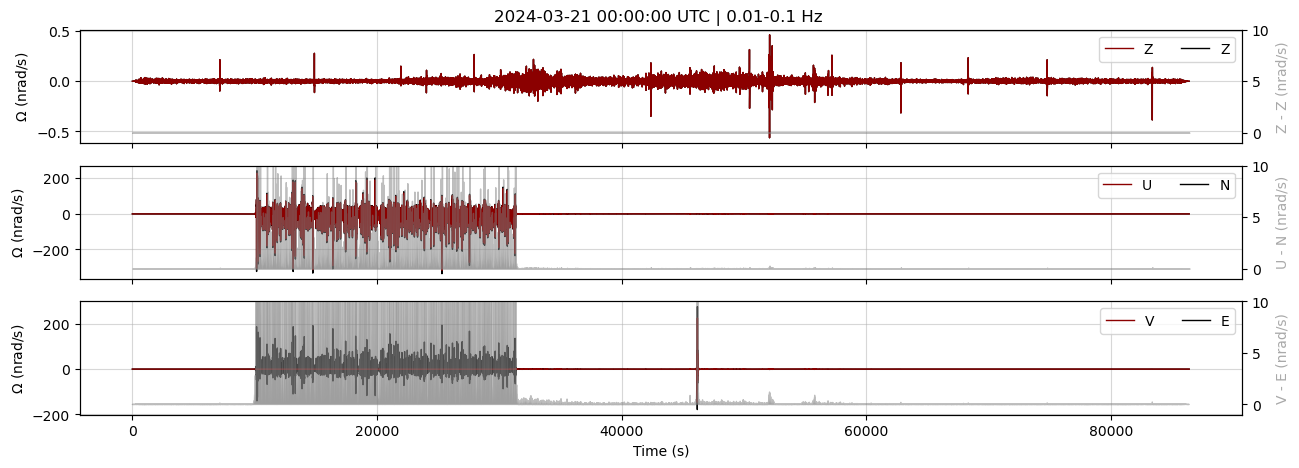

In [17]:
config['fmin'] = 0.01
config['fmax'] = 0.1

st_cp = rot.copy()
st_cp = st_cp.detrend("demean");
st_cp = st_cp.taper(0.01);
st_cp = st_cp.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);
st_cp.trim(config['tbeg'], config['tend'])

st_rot_cp = rot_zne.copy()
st_rot_cp = st_rot_cp.detrend("demean");
st_rot_cp = st_rot_cp.taper(0.01);
st_rot_cp = st_rot_cp.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

st_rot_cp.trim(config['tbeg'], config['tend'])

st_acc_cp = acc.copy()
st_acc_cp = st_acc_cp.detrend("demean");
st_acc_cp = st_acc_cp.taper(0.01);
st_acc_cp = st_acc_cp.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);


fig = __makeplot_waveform_comparison(st_cp, st_rot_cp)

fig.savefig(config['path_to_figs']+f"ROMY_{config['event_name']}_waveforms.png", format="png", dpi=200, bbox_inches='tight');


In [18]:
def __makeplot_spectra_comparison(st1, st2):

    def __multitaper_psd(arr, dt, n_win=5, time_bandwidth=4.0):

        import multitaper as mt

        out_psd = mt.MTSpec(arr, nw=time_bandwidth, kspec=n_win, dt=dt, iadapt=0)

        _f, _psd = out_psd.rspec()

        f = _f.reshape(_f.size)
        psd = _psd.reshape(_psd.size)

        ## 95% confidence interval
        # _psd95 = out_psd.jackspec()
        # psd95_lower, psd95_upper = psd95[::2, 0], psd95[::2, 1]

        return f, psd

    Tsec = 5
    f1_Z, psd1_Z = __multitaper_psd(st1.select(channel="*Z")[0].data, st1[0].stats.delta ,n_win=Tsec)
    f2_Z, psd2_Z = __multitaper_psd(st2.select(channel="*Z")[0].data, st2[0].stats.delta ,n_win=Tsec)

    f1_U, psd1_U = __multitaper_psd(st1.select(channel="*U")[0].data, st1[0].stats.delta ,n_win=Tsec)
    f2_N, psd2_N = __multitaper_psd(st2.select(channel="*N")[0].data, st2[0].stats.delta ,n_win=Tsec)

    f1_V, psd1_V = __multitaper_psd(st1.select(channel="*V")[0].data, st1[0].stats.delta ,n_win=Tsec)
    f2_E, psd2_E = __multitaper_psd(st2.select(channel="*E")[0].data, st2[0].stats.delta ,n_win=Tsec)


    fig, ax = plt.subplots(3, 1, figsize=(15, 5), sharex=True)

    font = 14

    rot_scaling = 1e9

    lw = 1

    ax[0].plot(f1_Z, psd1_Z, lw=lw, label="Z", color="darkred", ls="-", zorder=3)
    ax[0].plot(f2_Z, psd2_Z, lw=lw, label="Z", color="black", zorder=2)

    ax[1].plot(f1_U, psd1_U, lw=lw, label="U", color="darkred", ls="-", zorder=3)
    ax[1].plot(f2_N, psd2_N, lw=lw, label="N", color="black", zorder=2)

    ax[2].plot(f1_V, psd1_V, lw=lw, label="V", color="darkred", ls="-", zorder=3)
    ax[2].plot(f2_E, psd2_E, lw=lw, label="E", color="black", zorder=2)


    for i in range(3):
        ax[i].legend(loc=1, ncols=4)
        ax[i].set_xscale("log")
        # ax[i].set_yscale("log")
        ax[i].grid(which="both", alpha=0.5)
        ax[i].set_ylabel(r"PSD (rad$^2$/s$^2$/Hz)")
        ax[i].set_xlim(2e-2, 2e-1)

    ax[2].set_xlabel("Frequency (Hz)")
    ax[0].set_title(f"{config['tbeg'].date} {str(config['tbeg'].time).split('.')[0]} UTC | {config['fmin']}-{config['fmax']} Hz ")

    plt.show();
    return fig

In [19]:
fig = __makeplot_spectra_comparison(st_cp, st_rot_cp)

DPSS using interpolation 1728001 1000000
DPSS using interpolation 1728001 1000000



KeyboardInterrupt



In [ ]:
fig = __makeplot_waveforms(st_acc_cp, st_rot_cp)

## Write Data

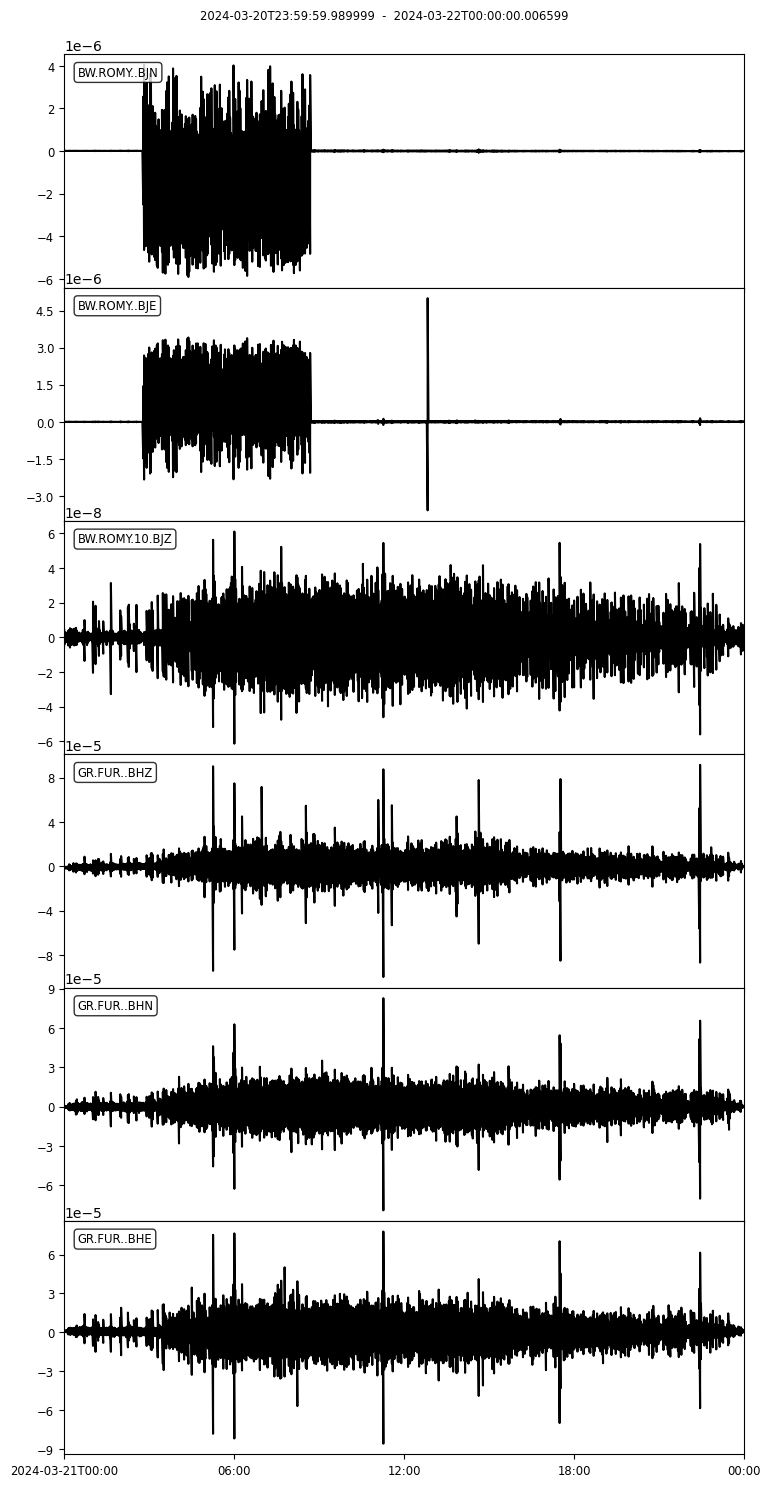

-> store:  /home/andbro/kilauea-data/romy_events/data/ROMY_Wind_20240321_6C.mseed


/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [20]:
st_all = rot_zne.copy();
st_all += acc.copy();

# st_all = st_all.resample(20, no_filter=False)

st_all = st_all.trim(config['tbeg'], config['tend'])

st_all.plot(equal_scale=False);

# filename = f"ROMY_{config['event_name']}_{str(config['tbeg'].date).replace('-','')}_{str(config['tbeg'].time).split('.')[0]}_6C.mseed"
filename = f"ROMY_{config['event_name']}_{str(config['tbeg'].date).replace('-','')}_6C.mseed"
print(f"-> store: ", config['path_to_outdata']+filename)
st_all.write(config['path_to_outdata']+filename, format="MSEED");
